In [127]:
#Imports
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, binom 
import matplotlib.pyplot as plt


### 1.) A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

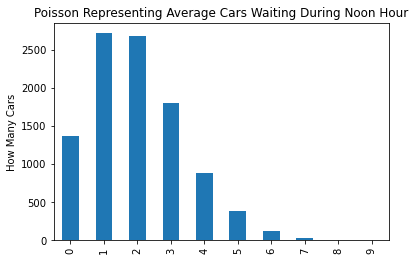

In [34]:
pd.Series(stats.poisson(2).rvs(10000)).value_counts().sort_index().plot.bar()

plt.title('Poisson Representing Average Cars Waiting During Noon Hour')
plt.ylabel('How Many Cars')
plt.show()

### What is the probability that no cars drive up in the noon hour?

In [20]:
avg_cars_waiting = 2


stats.poisson(avg_cars_waiting).pmf(0)

0.1353352832366127

In [359]:
# Sim
(np.random.poisson(2, size=(10_000))<1).mean()

0.1355

### What is the probability that 3 or more cars come through the drive through?

In [39]:
stats.poisson(avg_cars_waiting).sf(2)

0.32332358381693654

In [197]:
# Sim
n_cars = np.random.poisson(2, size=(10_000))
(n_cars >= 3).mean()

0.3261

In [360]:
# More efficient
(np.random.poisson(2, size=(10_000))>2).mean()

0.3201

### How likely is it that the drive through gets at least 1 car?

In [38]:
#1c.) How likely is it that the drive through gets at least 1 car?
stats.poisson(avg_cars_waiting).sf(0)

0.8646647167633873

In [198]:
# Sim
n_cars = np.random.poisson(2, size=(10_000))
(n_cars >= 1).mean()

0.8641

In [361]:
# More efficient
(np.random.poisson(2, size=(10_000))>0).mean()

0.8631

### 2.) Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

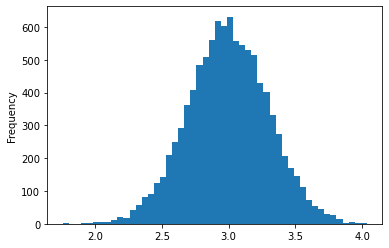

In [389]:
pd.Series(stats.norm(3, .3).rvs(10000)).sort_values().plot.hist(bins = 50)
plt.show()



### What grade point average is required to be in the top 5% of the graduating class?

In [45]:
stats.norm(3, .3).isf(.05)

3.4934560880854417

In [307]:
# Sim
gpa = np.random.normal(3, .3, size=(10_000))
np.percentile(gpa, 95)

3.49344080876153

### What GPA constitutes the bottom 15% of the class?

In [310]:
stats.norm(3, .3).ppf(.15)

2.689069983151863

In [208]:
# Sim
np.quantile(gpa, .15)

2.6948560444262033

### An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [403]:
# Differnent
print(f'{stats.norm(3, .3).ppf(.2)}-{stats.norm(3, .3).ppf(.3)}')

2.7475136299281258-2.842679846187588


In [52]:
min_gpa = stats.norm(3, .3).ppf(.2)
max_gpa = stats.norm(3, .3).ppf(.3)

#min_gpa
#max_gpa

min_gpa < 2.8 < max_gpa

True

### If I have a GPA of 3.5, what percentile am I in?

In [53]:
stats.norm(3, .3).cdf(3.5)

0.9522096477271853

In [209]:
# Sim
questioned_gpa = 3.5
(questioned_gpa > gpa).mean()

0.9548

### 3.) A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

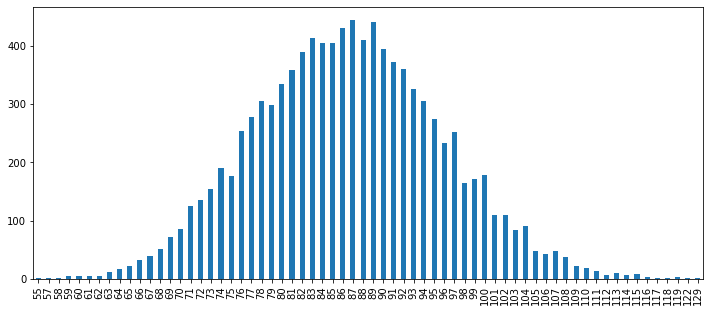

In [93]:
pd.Series(stats.binom(4326, .02).rvs(10000)).value_counts().sort_index().plot.bar(figsize=(12,5))
plt.show()

In [321]:
click_thru = .02
clicks = 97
trials = 4326

stats.binom(trials, click_thru).sf(96)

0.13975823631416445

In [324]:
# Sim
click_click = np.random.binomial(trials, click_thru, size=(10_000))
(click_click > clicks).mean()

0.117

### 4.) You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

### What is the probability that at least one of your first 60 answers is correct?

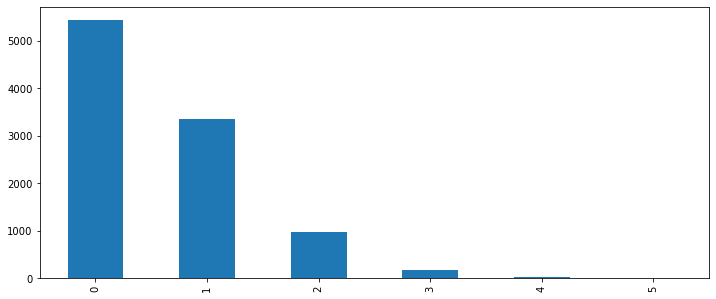

In [101]:
pd.Series(stats.binom(60, .01).rvs(10000)).value_counts().sort_index().plot.bar(figsize=(12,5))
plt.show()

In [303]:
questions = 100
trials = 60
p = .01

stats.binom(trials, p).sf(0)

0.45284335760923855

In [304]:
# Sim
questions_in_question = np.random.binomial(trials,p,size=(10_000))
(questions_in_question > 0).mean()

0.4584

### 5.) The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

In [282]:
students = round(.9*3*22)
trials = students
trials

59

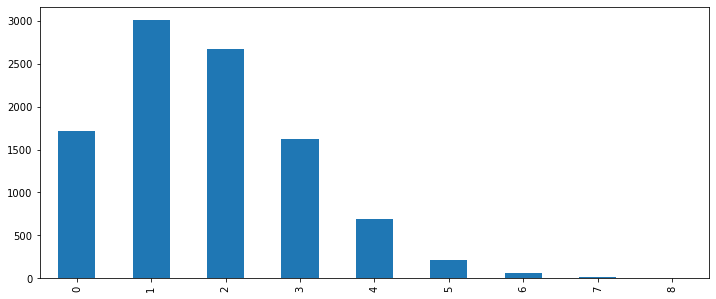

In [272]:
pd.Series(stats.binom(trials, .03).rvs(10000)).value_counts().sort_index().plot.bar(figsize=(12,5))
plt.show()

### How likely is it that the break area gets cleaned up each day? 

In [283]:
p = .03
stats.binom(trials, p).sf(0)

0.8342199288437352

In [273]:
# Sim
clean_each_day = np.random.binomial(trials,p, size=(10_000))
success = clean_each_day >=1
success.mean()

0.8256

### How likely is it that it goes two days without getting cleaned up? 

In [284]:
stats.binom(trials*2, p).pmf(0)

0.027483031992576134

In [288]:
# Sim
two_gross_days = np.random.binomial(trials*2,p, size=(10_000))
gross_two = two_gross_days <1
gross_two.mean()

0.0309

### All week?

In [285]:
stats.binom(trials*5, p).pmf(0)

0.00012521651388091245

In [292]:
five_gross_days = np.random.binomial(trials*5,p,size=(10_000))
gross_week = five_gross_days < 1
gross_week.mean()

0.0001

### 6.) You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [293]:
import math
# People in the way :P
mean = 15
std = 3

# Time needed
time = (60 - 15 - 10)
n_people = math.floor(time/2)
n_people

17

In [132]:
stats.norm(mean, std).cdf(n_people)

0.7475074624530771

In [297]:
# Sim
time_for_pan = np.random.normal(15,3,size=(10_000))
(time_for_pan < n_people).mean()

0.7559

### 7.) Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [1]:
from env import get_db_url

ModuleNotFoundError: No module named 'env'

In [346]:
url = get_db_url('employees')

In [239]:
employees = pd.DataFrame(pd.read_sql('SELECT * FROM employees', url))
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [348]:
salaries = pd.read_sql(
    '''SELECT salary 
       FROM salaries 
       WHERE to_date > NOW()''', 
       get_db_url('employees'))
salaries.head()

,salary
0,88958
1,72527
2,43311
3,74057
4,94692


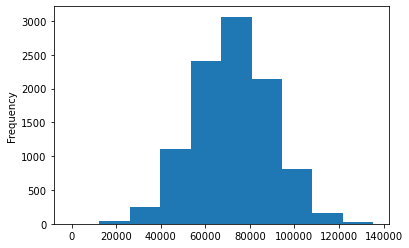

In [349]:
mean = salaries.mean()
std = salaries.std()

pd.Series(stats.norm(mean, std).rvs(10000)).plot.hist()
plt.show()

### What percent of employees earn less than 60,000?

In [350]:
stats.norm(mean,std).cdf(60000)[0]

0.24385742480214434

In [328]:
# Sim
below_six = np.random.normal(mean, std, size=(10_000))
(below_six < 60000).mean()

0.2458

### What percent of employees earn more than 95,000?

In [352]:
stats.norm(mean,std).sf(95000)[0]

0.09208819199804058

In [351]:
# Sim
above_nine_five = np.random.normal(mean, std, size=(10_000))
(above_nine_five > 95000).mean()

0.0966

### What percent of employees earn between 65,000 and 80,000?

In [353]:
above_six_five = stats.norm(mean,std).sf(65000)
above_eighty = stats.norm(mean,std).sf(80000)

between_six_five_and_eighty = above_six_five - above_eighty
between_six_five_and_eighty.mean()

0.3350605685446666

In [356]:
# Easier...
((salaries>65_000) & (salaries<80_000)).mean()

salary    0.325107
dtype: float64

### What do the top 5% of employees make?

In [354]:
round(stats.norm(mean,std).isf(.05)[0], 2)

100484.64

In [355]:
# Sim ****Why?????*****
salaries.salary[int(len(salaries)*.95)]

94119